In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
DATA_PATH_DTB_HOCKY = '/content/drive/MyDrive/Education_dataset_V2/sinhvien_dtb_hocky.xlsx'
DIEM_MERGE_DIEMTHU = '/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/1.dataset_cleaned/diem_merge_cleaned.csv'

In [ ]:
df_dtb_hocky = pd.read_excel(DATA_PATH_DTB_HOCKY)
df_diem_merge_clean = pd.read_csv(DIEM_MERGE_DIEMTHU)

# Kiểm tra diemtrungbinh học kì của sinh viên

In [ ]:
df_dtb_hocky = pd.read_excel(DATA_PATH_DTB_HOCKY)

In [ ]:
df_dtb_hocky.describe()

,hocky,namhoc,dtbhk,sotchk
count,84952.00000,84952.000000,84952.000000,84952.000000
mean,1.52605,2018.440861,6.714582,16.703350
std,0.60096,2.466169,2.049809,6.305202
min,1.00000,2013.000000,0.000000,0.000000
25%,1.00000,2017.000000,6.070000,14.000000
50%,1.00000,2019.000000,7.250000,18.000000
75%,2.00000,2021.000000,8.070000,20.000000
max,3.00000,2022.000000,10.000000,195.000000


In [ ]:
#Các dòng có số tín chỉ học kì lớn hơn 30 chắc chắn không đúng nên được bỏ qua
df_dtb_hocky_less_than_30 = df_dtb_hocky[df_dtb_hocky['sotchk']<=30]

In [ ]:
df_dtb_hocky_less_than_30.describe()

,hocky,namhoc,dtbhk,sotchk
count,84917.000000,84917.000000,84917.000000,84917.000000
mean,1.526255,2018.439476,6.714700,16.643134
std,0.600990,2.465677,2.049629,5.496074
min,1.000000,2013.000000,0.000000,0.000000
25%,1.000000,2017.000000,6.070000,14.000000
50%,1.000000,2019.000000,7.250000,18.000000
75%,2.000000,2021.000000,8.070000,20.000000
max,3.000000,2022.000000,10.000000,30.000000


In [ ]:
#Học kì hè chỉ được đăng kí tối đa 12 tín chỉ
df_dtb_hocky_less_than_30 = df_dtb_hocky_less_than_30[~((df_dtb_hocky_less_than_30['hocky'] == 3) & (df_dtb_hocky_less_than_30['sotchk'] > 12))]

In [ ]:
df_dtb_hocky_less_than_30['mssv'].nunique()

13574

<ipython-input-11-58ca99808d69>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='sotchk', y='count_sotchk', data=sotchk_count, palette='viridis')


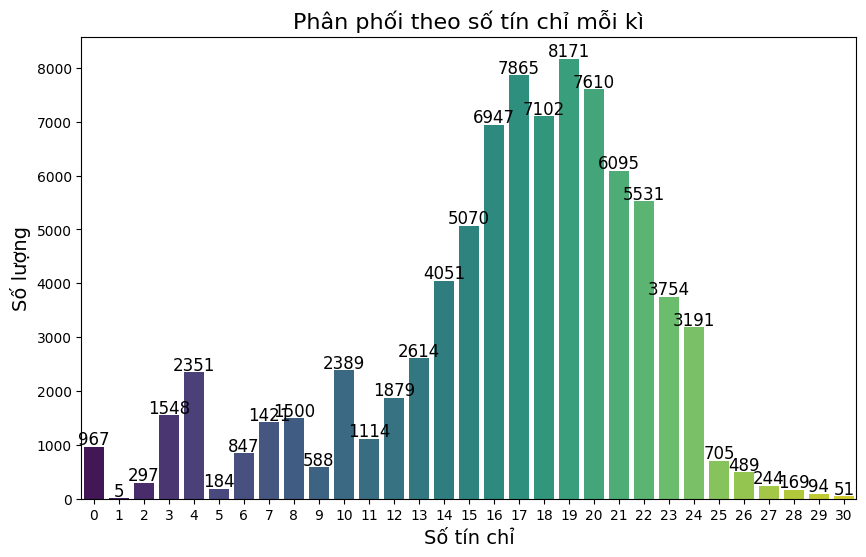

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each 'sotchk' value
sotchk_count = df_dtb_hocky_less_than_30['sotchk'].value_counts().reset_index(name='count_sotchk')
sotchk_count.columns = ['sotchk', 'count_sotchk']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='sotchk', y='count_sotchk', data=sotchk_count, palette='viridis')

# Adding labels and title
plt.title('Phân phối theo số tín chỉ mỗi kì', fontsize=16)
plt.xlabel('Số tín chỉ', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Annotating the bars with the exact number
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


In [ ]:
df_kichinh = df_dtb_hocky_less_than_30[df_dtb_hocky_less_than_30['hocky']!=3]

In [ ]:
df_ki3 = df_dtb_hocky_less_than_30[df_dtb_hocky_less_than_30['hocky']==3]

<ipython-input-14-830a7c8b99d6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='sotchk', y='count_sotchk', data=sotchk_count, palette='viridis')


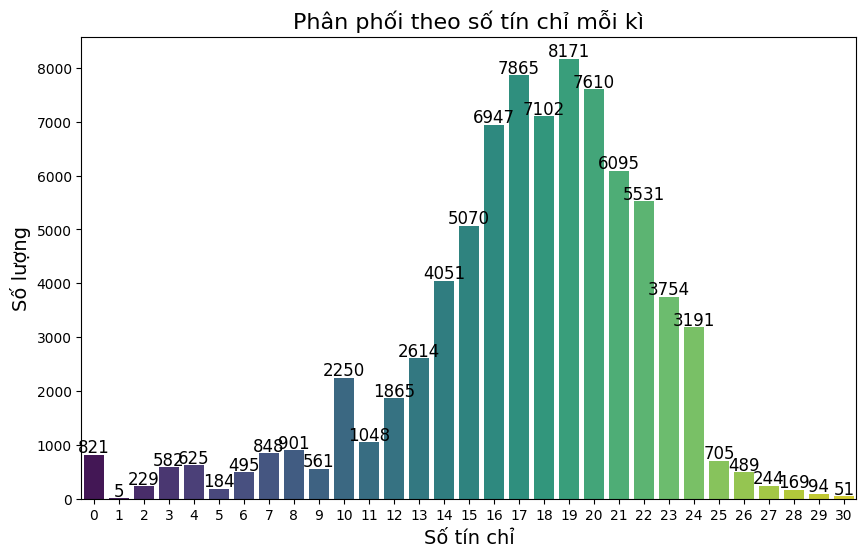

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each 'sotchk' value
sotchk_count = df_kichinh['sotchk'].value_counts().reset_index(name='count_sotchk')
sotchk_count.columns = ['sotchk', 'count_sotchk']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='sotchk', y='count_sotchk', data=sotchk_count, palette='viridis')

# Adding labels and title
plt.title('Phân phối theo số tín chỉ mỗi kì', fontsize=16)
plt.xlabel('Số tín chỉ', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Annotating the bars with the exact number
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


<ipython-input-15-8031c4a450fd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='sotchk', y='count_sotchk', data=sotchk_count, palette='viridis')


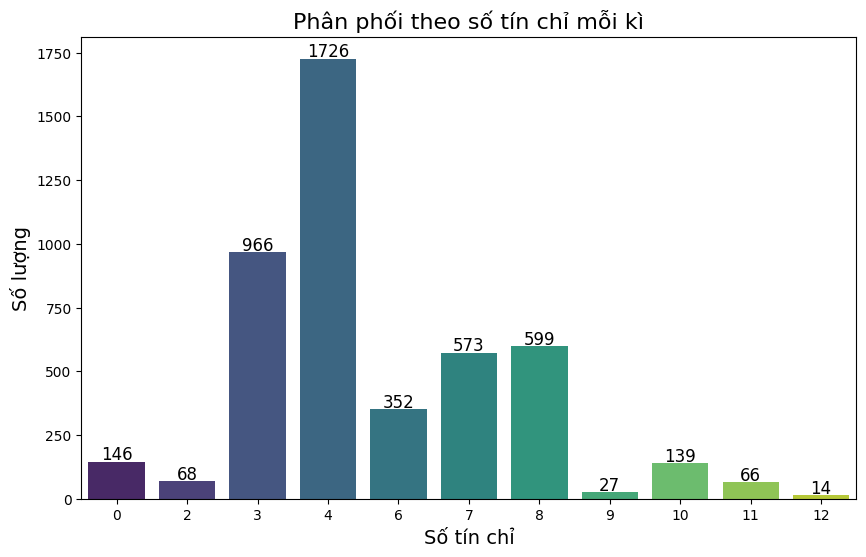

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each 'sotchk' value
sotchk_count = df_ki3['sotchk'].value_counts().reset_index(name='count_sotchk')
sotchk_count.columns = ['sotchk', 'count_sotchk']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='sotchk', y='count_sotchk', data=sotchk_count, palette='viridis')

# Adding labels and title
plt.title('Phân phối theo số tín chỉ mỗi kì', fontsize=16)
plt.xlabel('Số tín chỉ', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)

# Annotating the bars with the exact number
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


In [ ]:
dfzero = df_dtb_hocky_less_than_30[(df_dtb_hocky_less_than_30['sotchk']==0)&(df_dtb_hocky_less_than_30['dtbhk']==0)]

In [ ]:
dfzero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 76 to 84951
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mssv    967 non-null    object 
 1   hocky   967 non-null    int64  
 2   namhoc  967 non-null    int64  
 3   dtbhk   967 non-null    float64
 4   sotchk  967 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 45.3+ KB


In [ ]:
#df_dtb_hocky_less_than_30.to_csv('/content/drive/MyDrive/Nhóm 6 - DS317.P11/ĐỒ ÁN MÔN HỌC/1.dataset_cleaned/sinhvien_dtb_hocky_clean.csv',index = False)